# Importing libraries

In [20]:
import numpy as np
import scipy as sp

from matplotlib import pyplot as plt
from scipy.spatial import distance_matrix
from scipy.stats import norm

from sklearn.metrics.pairwise import rbf_kernel

import main

# Inserting data

In [21]:
input = np.matrix(
[[  4.85853908,   0.29264951,  -5.64316805,   9.81972518,   7.9492724,
    1.92750418,  -1.24075805,  -6.48487387,   6.22446585,   2.07769571,
    9.51170346,   7.65247705,  -4.25322839,  -8.23537324,   9.75675858],
 [  2.62422724,  -9.47562135,  -4.41958785,  -9.85431026,  -4.01364902,
    5.9979968 ,   3.53872127,  -6.81049435,  -7.56037611,   2.76180307,
    9.00563264,  -4.37436277,   3.266966,    -0.85119274,   2.65128315],
 [ -9.06301035,  -9.18585231,  -6.85628647,  -3.62152318,   5.12010448,
   -6.7785217 ,   1.60064099,  -1.21502076,  -1.3987166,    8.79564151,
    0.34618584,   0.33343746,   5.70493721,  -4.85046626,  -9.45697153],
 [  0.16804821,  -4.63473701,  -1.81044539,   4.44922826,   8.49429373,
    8.48841504,  -4.47454512,  -6.86510814,  -0.25614456,   9.62562157,
   -6.78572882,  -7.92165821,   0.77713558,   5.88426101,   7.598086,  ],
 [ -0.35092269,  -4.56115277,   9.48842148,   3.60258221,   0.97993953,
   -2.21848677,   5.05476828,  -5.88156714,   9.72735595,   0.91025344,
    7.24139513,  -7.55138783,   2.7173233,    1.33470782,   5.99120837],
 [ -4.60688795,  -3.96145816, -10.08221502,  -0.9789933,   -2.35521483,
   -4.30937079,   3.72177732,   9.56621392,   2.62614456,   8.55578155,
   -9.60157478,   3.97232813,   6.96655161,   7.97053188,  -4.84330868],
 [  3.14184702,  -9.18632997,  -1.89404705,   6.72382522,   5.52611689,
   -6.68624916,   4.82922971,   1.61384457,  -9.55781735,   8.50936308,
   -0.12984879,   9.17004778,  -0.81480509,  -7.69056483,   7.67670119],
 [ -7.37739942,   6.9745423,    4.73219916,  -2.82739173,  10.07548483,
   -8.81455134,  -8.85963002,   9.29630146,  -3.94509661,  -6.84282777,
    3.91873362,  -4.17838065,  -5.70391422,   0.35267389,   2.34294163],
 [  1.85874407,  -1.84842022,   3.49942813,   3.42022312,   1.55108228,
    6.68744406,  -6.52557999,  -7.01636334,  -6.37274029,  -6.53437638,
    0.84813711,   3.66960031,  -4.90856763,  -3.0021808,   -7.70551543],
 [ -8.76788521,   2.29263138,   9.42620525,   4.03853125,   0.07190286,
   -3.10965609,   4.89884753,   6.78601628,   6.43183369,   0.40332715,
    7.25519368,   5.94379566,   9.35602916,   8.56126403,   4.6396524, ],
 [ -6.13652396,   8.7084373,    9.47563112,   0.7912272,    2.93506255,
   -2.14849558,   8.54616827,  -2.56540468,   2.17572908,   7.11853333,
    7.36420109,   3.60610401,  -4.42378223,   7.37184277,  -9.26309894],
 [ -5.03501327,   7.03609397,  -5.65327963,   6.93755322, -10.01548999,
   -8.18708409,  -7.56173167,  -1.01776416,   6.35254392,  -9.88598384,
   -4.89078186,   3.95227807,  -3.8680355,    0.31616577,   2.98170188],
 [  8.01439798,   1.5996695,   -5.57723052,  -2.18898531,  -2.94676166,
   -0.20260335,   5.61203843,   1.9315522,    0.74783266,   6.03350784,
   -9.44365641,   5.3603537,    3.07001747,   5.96917097,  -6.84316909],
 [  3.88006333,   5.57621839,   0.61469539,  -4.16507444,   2.95990793,
   -3.33670836,  -8.1090191,    6.88661496,  -5.70007916,  -7.82974883,
   -6.98405658,   2.90035903,  -6.34164444,   9.91087098,   8.96175079],
 [  0.91357933,  -6.87103444,   2.25633462,  -9.39504916,  -1.51720959,
   -8.46641763,  -6.86441395,   4.8980835,    5.31058177,   3.3930114,
    5.93883827,   4.54147188,  -5.29725022,  -8.26384378,   6.76235976]]
 )

# Creating kernels

In [ ]:
k_values = [3, 4]
sig_values = [1, 2]
kernels_amount = 4
input_size = 15

In [23]:
kernels = main.create_kernels(input, k_values, sig_values)

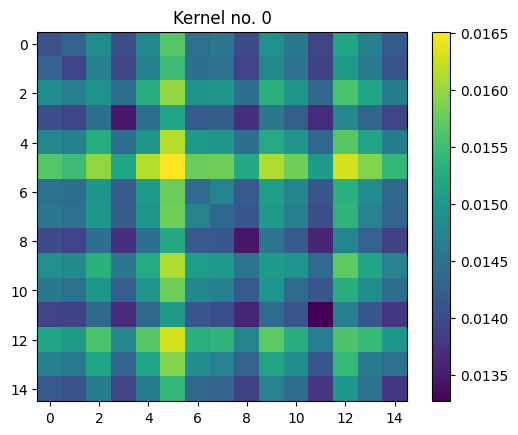

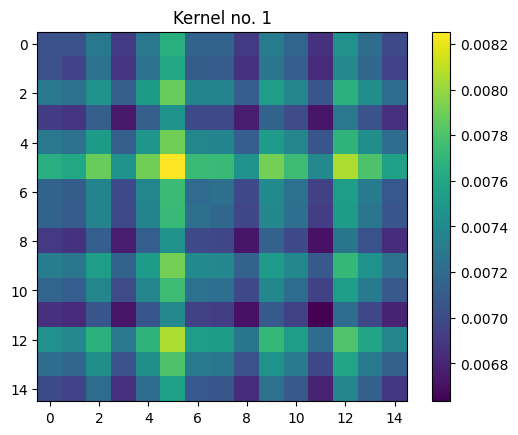

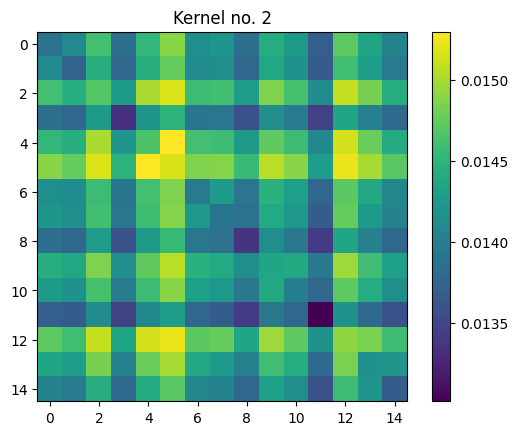

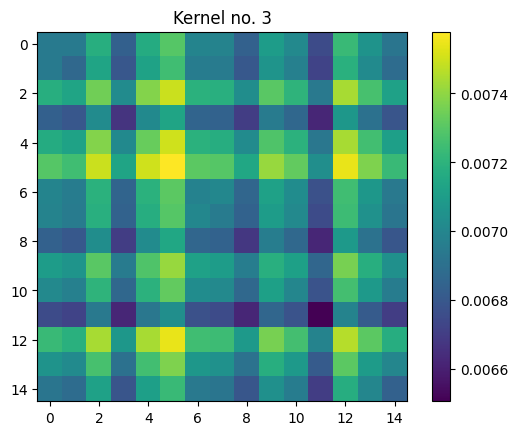

In [24]:
for i in range(0, len(kernels)):
	plt.title(f"Kernel no. {i}")
	plt.imshow(kernels[i], interpolation="nearest", origin="upper")
	plt.colorbar()
	plt.show()


In [25]:
weights = np.full((kernels_amount), 1/kernels_amount)

In [26]:
similarity_matrix = np.zeros((input_size, input_size))
for i in range(0, kernels_amount):
    similarity_matrix = similarity_matrix + np.multiply(kernels[i], weights[i])

ValueError: operands could not be broadcast together with shapes (10,10) (15,15) 

In [ ]:
print(similarity_matrix)

In [ ]:
plt.imshow(similarity_matrix, interpolation="nearest", origin="upper")
plt.colorbar()
plt.show()

# Optimalization

## First step